In [2]:
import pandas as pd
import gensim
import time
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [5]:
with open('Data/Germany_stemmed.txt') as file:
    lines = file.readlines()

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
lines[0]

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'great place visit great visit histor build unfortun could get reserv visit glass dome parliament build pleas book well advanc\n'

In [7]:
len(lines)

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


27827

## Tokenize

In [8]:
list(gensim.utils.tokenize(lines[0], deacc = True))

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['great',
 'place',
 'visit',
 'great',
 'visit',
 'histor',
 'build',
 'unfortun',
 'could',
 'get',
 'reserv',
 'visit',
 'glass',
 'dome',
 'parliament',
 'build',
 'pleas',
 'book',
 'well',
 'advanc']

In [9]:
corpus = [list(gensim.utils.tokenize(line, deacc = True)) for line in lines]

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
corpus = pd.DataFrame({'reviews': corpus})
corpus.head()

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


reviews
0  [great, place, visit, great, visit, histor, bu...
1  [histori, nerd, stop, polit, center, germani, ...
2  [famou, reichstag, admir, outsid, gave, us, id...
3  [must, tour, berlin, build, import, much, hist...
4  [plan, ahead, found, place, berlin, advanc, re...

In [11]:
docs = corpus['reviews']

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Bag of words

In [46]:
dictionary = gensim.corpora.Dictionary(docs)
print(len(dictionary))

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


22407


In [13]:
count=0
for k,v in dictionary.iteritems():
    print(k,v)
    count+=1
    if count>20:
        break

0 advanc
1 book
2 build
3 could
4 dome
5 get
6 glass
7 great
8 histor
9 parliament
10 place
11 pleas
12 reserv
13 unfortun
14 visit
15 well
16 architectur
17 berlin
18 center
19 germani
20 histori


/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
bow = [dictionary.doc2bow(doc) for doc in docs]

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
start = time.time()
lda_model = gensim.models.LdaModel(bow,
                                    num_topics=50,
                                    id2word=dictionary,
                                    passes=2)
end = time.time()
print("Processing time: %fs" % (end - start))

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing time: 46.787880s


In [16]:
for idx,topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.075*"well" + 0.035*"maintain" + 0.035*"fabul" + 0.027*"shoe" + 0.025*"worth" + 0.023*"comfort" + 0.023*"wear" + 0.017*"interior" + 0.015*"visit" + 0.014*"thought"


Topic: 1 
Words: 0.081*"organ" + 0.070*"music" + 0.067*"nuremberg" + 0.049*"concert" + 0.039*"play" + 0.035*"magic" + 0.031*"wine" + 0.023*"sound" + 0.022*"man" + 0.018*"listen"


Topic: 2 
Words: 0.121*"day" + 0.036*"recommend" + 0.035*"trip" + 0.034*"weather" + 0.028*"visit" + 0.024*"cold" + 0.023*"highli" + 0.014*"hot" + 0.014*"munich" + 0.014*"warm"


Topic: 3 
Words: 0.026*"memori" + 0.016*"origin" + 0.015*"war" + 0.015*"visit" + 0.014*"one" + 0.014*"german" + 0.013*"ship" + 0.012*"rebuilt" + 0.009*"world" + 0.008*"first"


Topic: 4 
Words: 0.032*"german" + 0.016*"read" + 0.016*"speak" + 0.015*"english" + 0.014*"inform" + 0.014*"histori" + 0.013*"visit" + 0.011*"time" + 0.010*"understand" + 0.009*"live"


Topic: 5 
Words: 0.038*"hotel" + 0.019*"stay" + 0.013*"queue" + 0.013*"stand" + 0.012*"experi" +

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
pyLDAvis.enable_notebook()

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
gensimvis.prepare(lda_model, bow, dictionary)

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
24     0.092606  0.147228       1        1  6.489616
13     0.078138  0.167251       2        1  4.725531
19     0.037808  0.106884       3        1  4.518535
7      0.051604  0.074648       4        1  3.507423
33     0.187549  0.062900       5        1  3.323896
36     0.047977 -0.061252       6        1  3.314593
23     0.103452 -0.122051       7        1  3.275674
35     0.112447  0.093904       8        1  3.192411
14     0.130714  0.112499       9        1  3.140856
9      0.170714 -0.084261      10        1  3.061878
26     0.154744 -0.205711      11        1  3.002521
16     0.026750 -0.226962      12        1  2.921718
40    -0.075182 -0.080377      13        1  2.895398
4      0.019786  0.149382      14        1  2.825552
21     0.124354 -0.150164      15        1  2.637577
44     0.089282  0.098604      16        1  2.553977
3     -0.087317  0.079025      17        1  2.472130
11    -0.071213 -0.148939      18        1  2.398492
2      0.117796  0.086089      19        1  2.383750
49     0.002752 -0.128026      20        1  2.241664
10    -0.037191  0.076519      21        1  2.187478
38     0.062516 -0.006706      22        1  2.149484
15     0.096919 -0.180564      23        1  2.036325
46     0.071907  0.003713      24        1  1.625160
31     0.058330  0.110126      25        1  1.566359
5      0.003639  0.134244      26        1  1.515335
39     0.093603  0.000722      27        1  1.487189
34    -0.014136 -0.098270      28        1  1.462579
41    -0.083499  0.005203      29        1  1.261958
20     0.015865 -0.011449      30        1  1.238355
8      0.113942 -0.047884      31        1  1.233607
32     0.012587  0.026768      32        1  1.192344
42     0.022929  0.065433      33        1  1.190147
27    -0.063709  0.029227      34        1  1.163406
48    -0.085764  0.012499      35        1  1.116873
22    -0.012527  0.062550      36        1  1.054689
45    -0.047851  0.005946      37        1  1.028381
0     -0.043794 -0.017004      38        1  1.025971
6     -0.083673 -0.076510      39        1  0.987421
28    -0.131657 -0.103130      40        1  0.958573
12    -0.166052  0.011990      41        1  0.863144
29    -0.132036  0.027519      42        1  0.845878
25    -0.189116 -0.057846      43        1  0.828529
37    -0.141913  0.037681      44        1  0.817964
1     -0.147086  0.011978      45        1  0.814155
47    -0.012373 -0.069209      46        1  0.791073
30    -0.047868 -0.068242      47        1  0.710227
17    -0.104060  0.073980      48        1  0.699539
43    -0.164083  0.056086      49        1  0.658321
18    -0.158611  0.013954      50        1  0.606346, topic_info=         Term         Freq        Total Category  logprob  loglift
2800    castl  6333.000000  6333.000000  Default  30.0000  30.0000
85       tour  6655.000000  6655.000000  Default  29.0000  29.0000
90       view  8967.000000  8967.000000  Default  28.0000  28.0000
108      park  7372.000000  7372.000000  Default  27.0000  27.0000
1646     ride  3309.000000  3309.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1773  paradis    57.832324   123.344585  Topic50  -4.6536   4.3480
58       line   127.006758  1145.602373  Topic50  -3.8670   2.9060
274    across    82.574833   740.655023  Topic50  -4.2975   2.9116
122      tree    57.035189   472.809250  Topic50  -4.6675   2.9905
1304  distanc    51.596260   386.165509  Topic50  -4.7677   3.0927

[2940 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1839     39  0.990374       a
3911     44  0.943757  aachen
335      13  0.981503    abil
2154     12  0.955773  abound
1714     21  0.966063  abroad
...     ...       ...     ...
2549     40  0.938397    youv
2401     29  0.988478      yr
1941      1  0.988171   yummi
1854     22  0.891994    zone

## TF-IDF

In [30]:
from gensim.models.coherencemodel import CoherenceModel

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
tfidf = gensim.models.TfidfModel(bow)
tfidf = tfidf[bow]

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
country = "Germany"
no_iterations = 100
file_name = "Data/" + country + "_"+str(no_iterations) +"_result.csv"
file_write = open(file_name, "a")

for no_topics in range(40,101):

    start = time.time()
    lda_model_tfidf = gensim.models.LdaModel(tfidf, 
                                             num_topics=no_topics, 
                                             id2word = dictionary, 
                                             passes = 2,
                                            iterations= no_iterations)
    end = time.time()
    print("Number of topics: " + str(no_topics))
    print("Processing time: %fs" % (end - start))
    cm = CoherenceModel(model=lda_model_tfidf, corpus=bow, dictionary=dictionary ,coherence='u_mass', topn=20)
    coherence = cm.get_coherence() 
    file_write.write(str(no_topics) + "," + str(coherence) +","+str(end-start)+"\n")
    print("Topics coherence: " + str(coherence))
    
file_write.close()

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of topics: 40
Processing time: 30.558388s
Topics coherence: -11.352204853733713
Number of topics: 41
Processing time: 29.471413s
Topics coherence: -10.571258356503856
Number of topics: 42
Processing time: 29.846334s
Topics coherence: -11.670650633577196
Number of topics: 43
Processing time: 30.599882s
Topics coherence: -11.304952722517429
Number of topics: 44
Processing time: 30.017099s
Topics coherence: -10.44825024894018
Number of topics: 45
Processing time: 29.860677s
Topics coherence: -10.44497683886873
Number of topics: 46
Processing time: 30.121373s
Topics coherence: -10.645186636232063
Number of topics: 47
Processing time: 30.718860s
Topics coherence: -10.566962309838859
Number of topics: 48
Processing time: 29.822988s
Topics coherence: -11.187985602853805
Number of topics: 49
Processing time: 30.458230s
Topics coherence: -10.50277187985968
Number of topics: 50
Processing time: 33.168908s
Topics coherence: -10.514890574604376
Number of topics: 51
Processing time: 36.89412

In [42]:
start = time.time()
lda_model_tfidf = gensim.models.LdaModel(tfidf, 
                                             num_topics=73, 
                                             id2word = dictionary, 
                                             passes = 2,
                                            iterations= 50)
end = time.time()
print("Number of topics: " + str(no_topics))
print("Processing time: %fs" % (end - start))
cm = CoherenceModel(model=lda_model_tfidf, corpus=bow, dictionary=dictionary ,coherence='u_mass', topn=20)
coherence = cm.get_coherence() 
print("Topics coherence: " + str(coherence))

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of topics: 100
Processing time: 34.739790s
Topics coherence: -5.737269868862827


In [43]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.084*"climb" + 0.074*"stair" + 0.058*"dom" + 0.034*"breath" + 0.029*"shape" + 0.023*"hundr" + 0.014*"commit" + 0.011*"requir" + 0.006*"narrow" + 0.005*"strictli"


Topic: 1 Word: 0.054*"upstair" + 0.031*"tuck" + 0.025*"curv" + 0.007*"mint" + 0.005*"rack" + 0.000*"saw" + 0.000*"away" + 0.000*"gt" + 0.000*"interest" + 0.000*"supercar"


Topic: 2 Word: 0.078*"typic" + 0.046*"oldest" + 0.046*"masterpiec" + 0.039*"intern" + 0.038*"sculptur" + 0.036*"paint" + 0.032*"impos" + 0.031*"known" + 0.023*"current" + 0.019*"enorm"


Topic: 3 Word: 0.357*"opera" + 0.031*"condit" + 0.030*"otherwis" + 0.024*"someon" + 0.023*"standard" + 0.023*"madonna" + 0.019*"fairli" + 0.011*"hat" + 0.010*"regularli" + 0.009*"jan"


Topic: 4 Word: 0.070*"climat" + 0.061*"ww" + 0.047*"daughter" + 0.032*"ive" + 0.020*"usa" + 0.011*"accur" + 0.008*"yo" + 0.006*"messag" + 0.005*"recogn" + 0.001*"fantast"


Topic: 5 Word: 0.102*"nearbi" + 0.051*"join" + 0.044*"card" + 0.032*"cash" + 0.028*"driver" + 0.027*"

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
pyLDAvis.gensim_models.prepare(lda_model_tfidf, tfidf, dictionary)

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: Object of type complex is not JSON serializable

PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
9      0.394162+0.000000j  0.064358+0.000000j       1        1  10.058264
6      0.356993+0.000000j -0.035704+0.000000j       2        1   5.832525
36     0.343092+0.000000j  0.001253+0.000000j       3        1   4.899686
33     0.348365+0.000000j  0.012770+0.000000j       4        1   4.525271
13     0.335813+0.000000j  0.012821+0.000000j       5        1   4.379497
...                   ...                 ...     ...      ...        ...
48    -0.144145+0.000000j  0.003613+0.000000j      69        1   0.313487
61    -0.144145+0.000000j  0.003613+0.000000j      70        1   0.313487
56    -0.144145+0.000000j  0.003613+0.000000j      71        1   0.313487
19    -0.144145+0.000000j  0.003613+0.000000j      72        1   0.313487
60    -0.144145+0.000000j  0.003613+0.000000j      73        1   0.313487

[73 ro

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


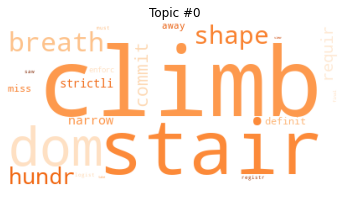

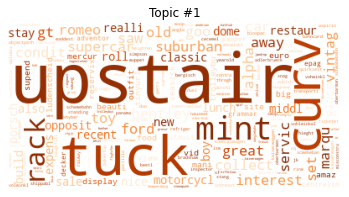

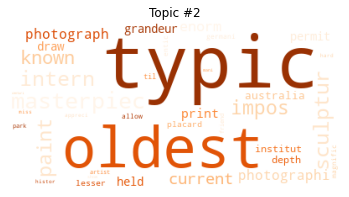

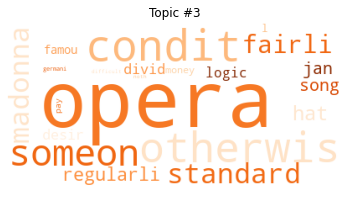

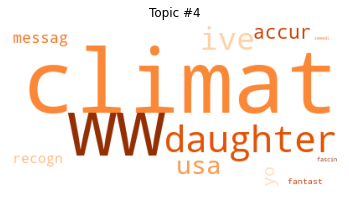

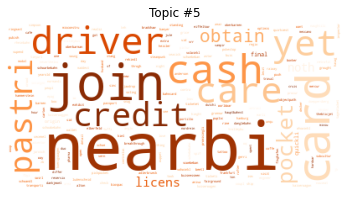

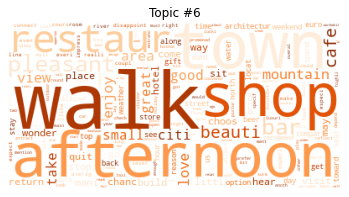

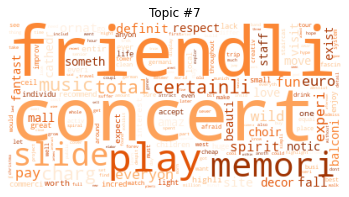

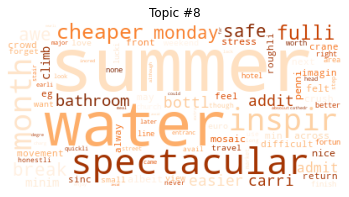

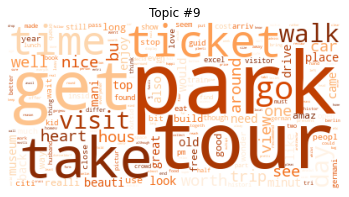

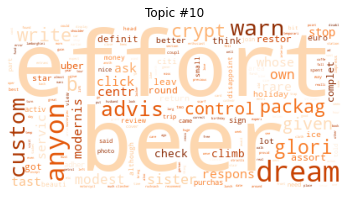

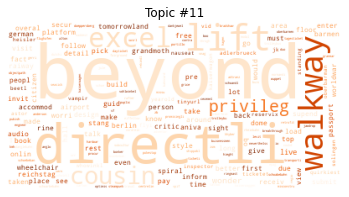

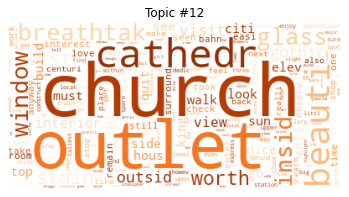

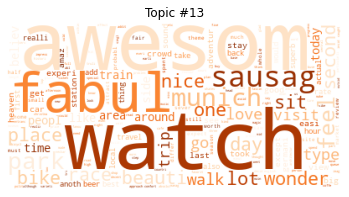

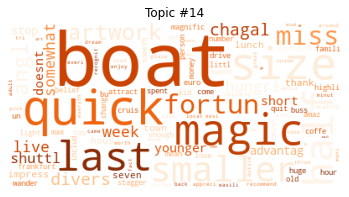

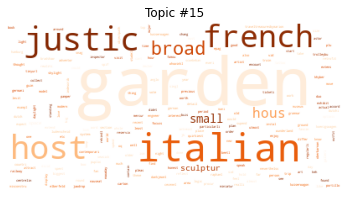

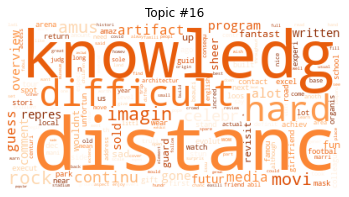

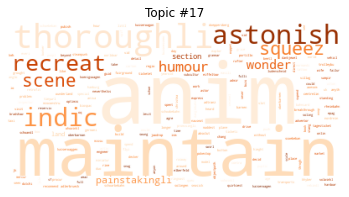

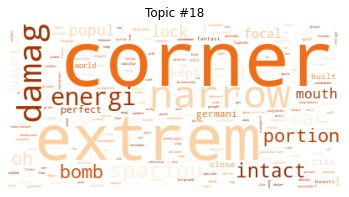

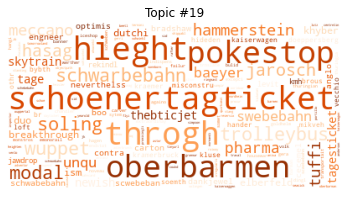

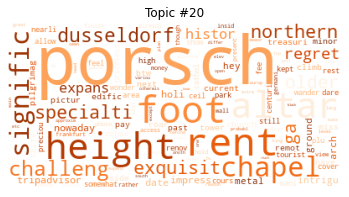

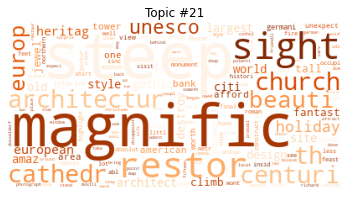

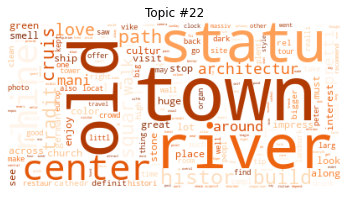

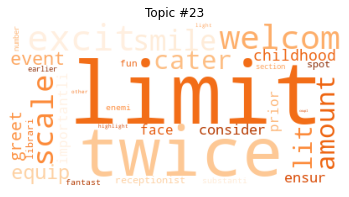

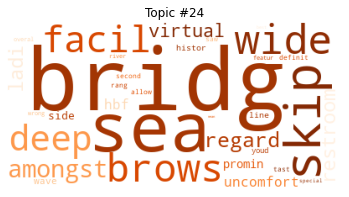

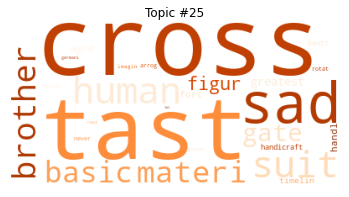

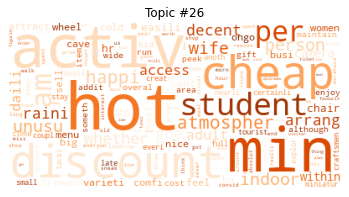

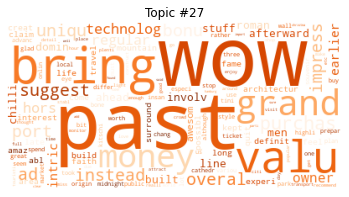

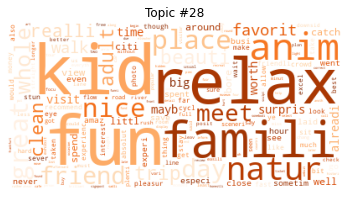

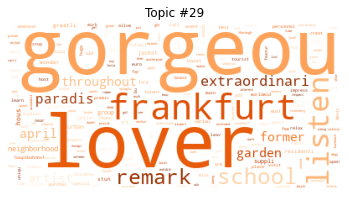

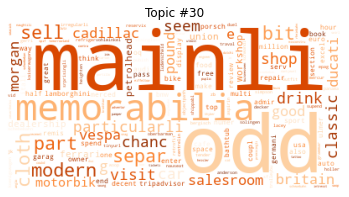

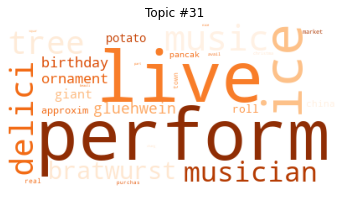

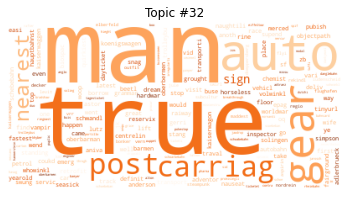

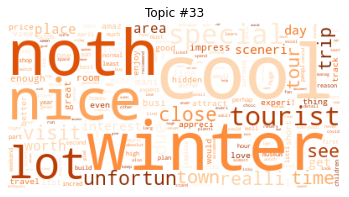

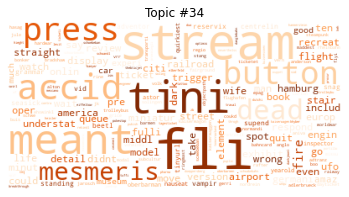

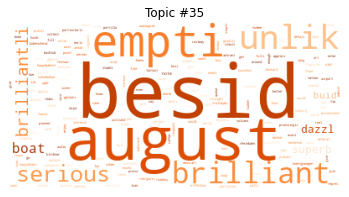

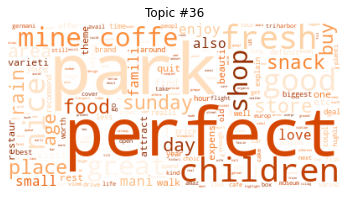

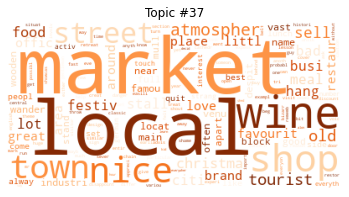

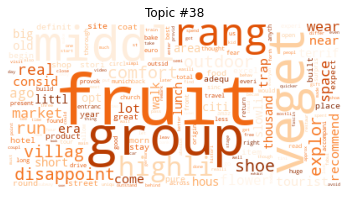

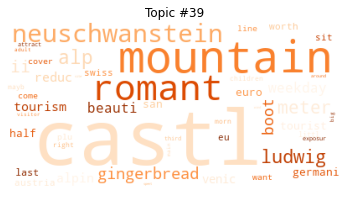

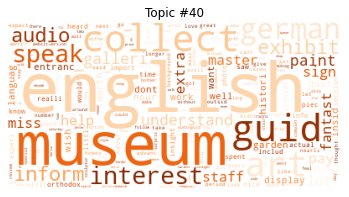

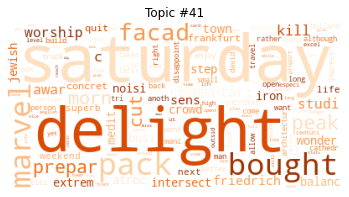

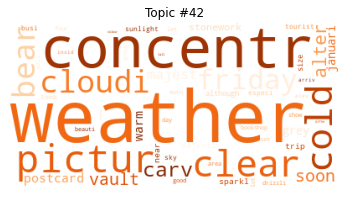

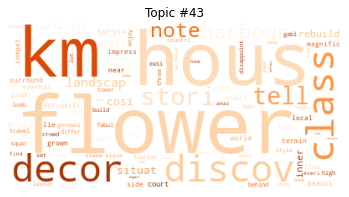

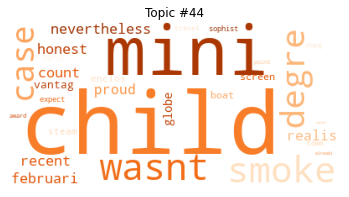

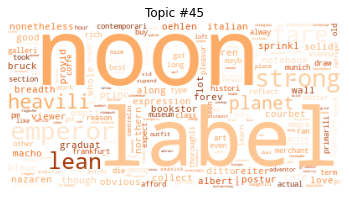

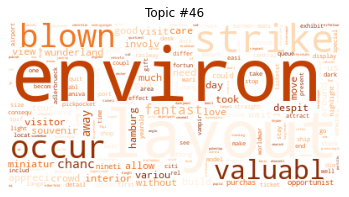

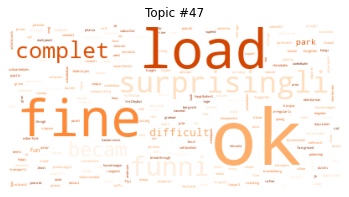

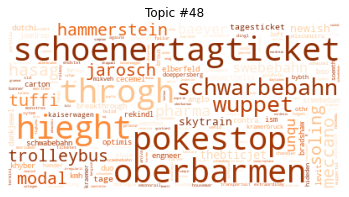

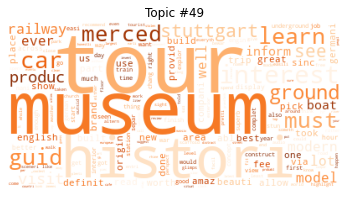

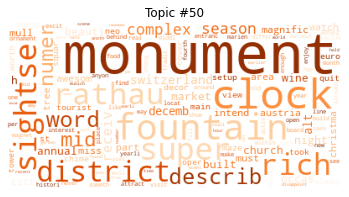

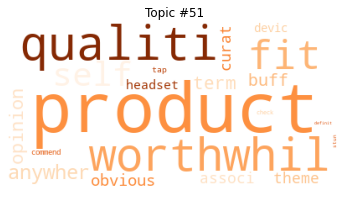

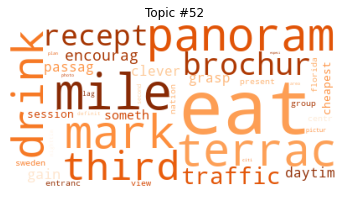

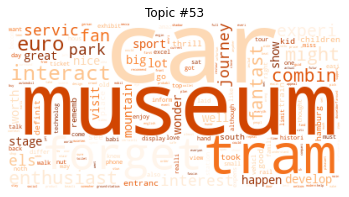

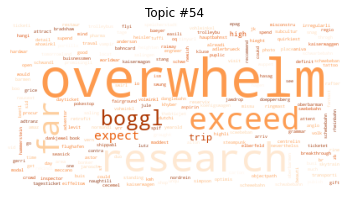

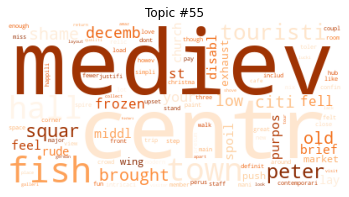

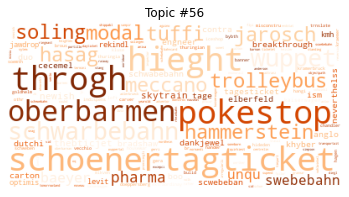

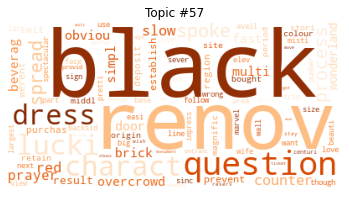

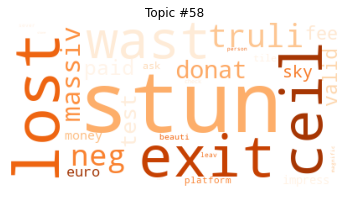

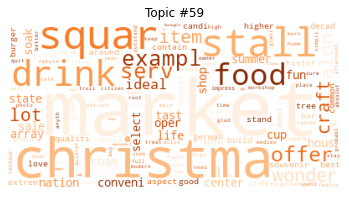

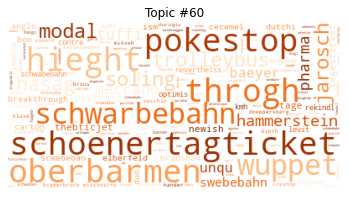

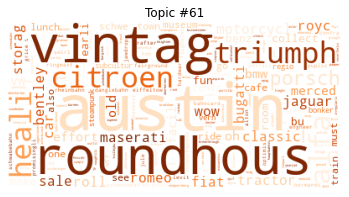

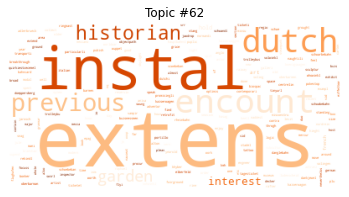

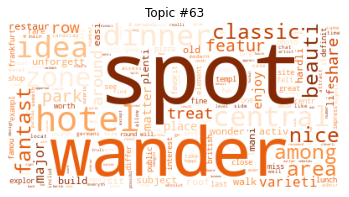

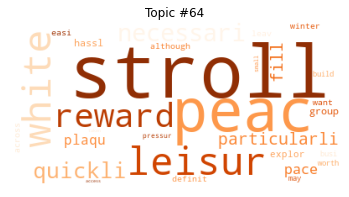

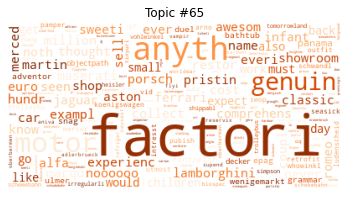

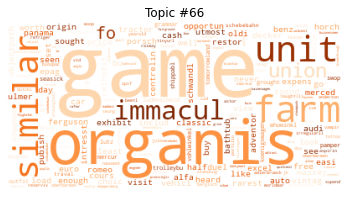

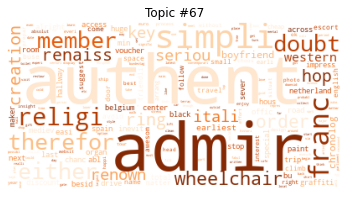

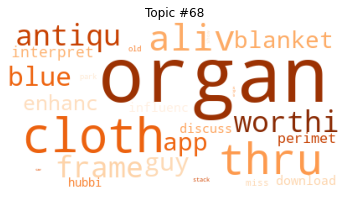

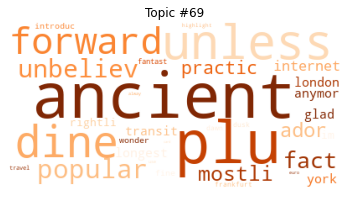

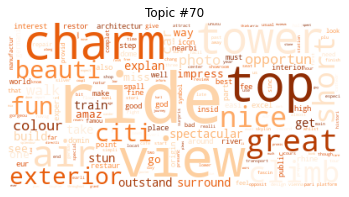

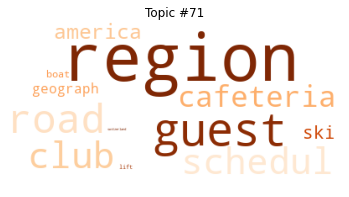

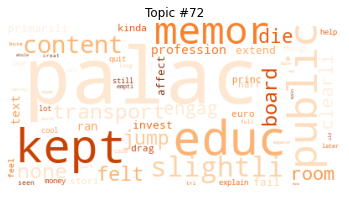

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for t in range(lda_model_tfidf.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', colormap='Oranges').fit_words(dict(lda_model_tfidf.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [25]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
cm = CoherenceModel(model=lda_model_tfidf, corpus=bow, dictionary=dictionary ,coherence='u_mass')
coherence = cm.get_coherence()  # get coherence value

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
coherence

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-10.813985800491702